In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from lib.svx001 import create_position, read_factors, scale_factors

In [3]:
from lib.cux002 import StrategyEvaluate1

In [4]:
method = 'cicso0'
instruments = 'ims'
task_id = '200037'
period = 5
name = 'linear'

In [5]:
strategy_settings = {'commission': 0.000023, 'slippage': 0, 'size': 200}

In [6]:
predict_data = read_factors(method=method,
                                instruments=instruments,
                                task_id=task_id,
                                period=period,
                                name=name)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
0,2024-12-05 10:20:00,IM,-5.284011,-0.001860
5,2024-12-05 10:25:00,IM,-0.186690,-0.000206
10,2024-12-05 10:30:00,IM,-1.949980,0.003050
15,2024-12-05 10:35:00,IM,-0.980163,0.004669
20,2024-12-05 10:40:00,IM,-5.241567,0.000327


In [61]:
scale_factors(predict_data, method='roll_zscore',win=240, factor_name='predict')

In [62]:
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h,transformed
0,2024-12-05 10:20:00,IM,-5.284011,-0.001860,NaN
5,2024-12-05 10:25:00,IM,-0.186690,-0.000206,NaN
10,2024-12-05 10:30:00,IM,-1.949980,0.003050,NaN
15,2024-12-05 10:35:00,IM,-0.980163,0.004669,NaN
20,2024-12-05 10:40:00,IM,-5.241567,0.000327,NaN


In [63]:
signal_method = 'adaptive_signal'
signal_params = {'roll_num':25, 'threshold':0.9}
strategy_method = None#'trailing_atr_strategy'
strategy_params = None#{'atr_period':14,'atr_multiplier':6, 'max_volume':1}
#signal_method = 'quantile_signal'
#signal_params = {'roll_num':20, 'threshold':0.7}

In [64]:
pos_data, total_data2 = create_position(predict_data=predict_data,
                    signal_method=signal_method,
                    signal_params=signal_params,
                    strategy_method=strategy_method,
                    strategy_params=strategy_params)

In [65]:
pos_data.head()

code,IM
trade_time,
2024-12-05 10:20:00,0
2024-12-05 10:25:00,0
2024-12-05 10:30:00,0
2024-12-05 10:35:00,0
2024-12-05 10:40:00,0


In [66]:
eval1 = StrategyEvaluate1(pos_data=pos_data, total_data=total_data2,
                  strategy_settings=strategy_settings,
                  strategy_name=signal_method,
                  ret_name='nxt1_ret_{0}h'.format(period),
)

In [67]:
eval1.run()

{'final_return': 0.06608641188633313,
 'annual_return': 0.1797142121236166,
 'sharpe_ratio': 2.2415992095908366,
 'calmar_ratio': 6.752483861350102,
 'p/l_ratio': 1.1405434000458168,
 'win_ratio': 0.1054726368159204,
 'turnover': 0.2175787728026534,
 'max_drawdown': -0.039759064645251564,
 'downside_risk': 0.04525276461124673,
 'annual_volatility': 0.07499376375022501}

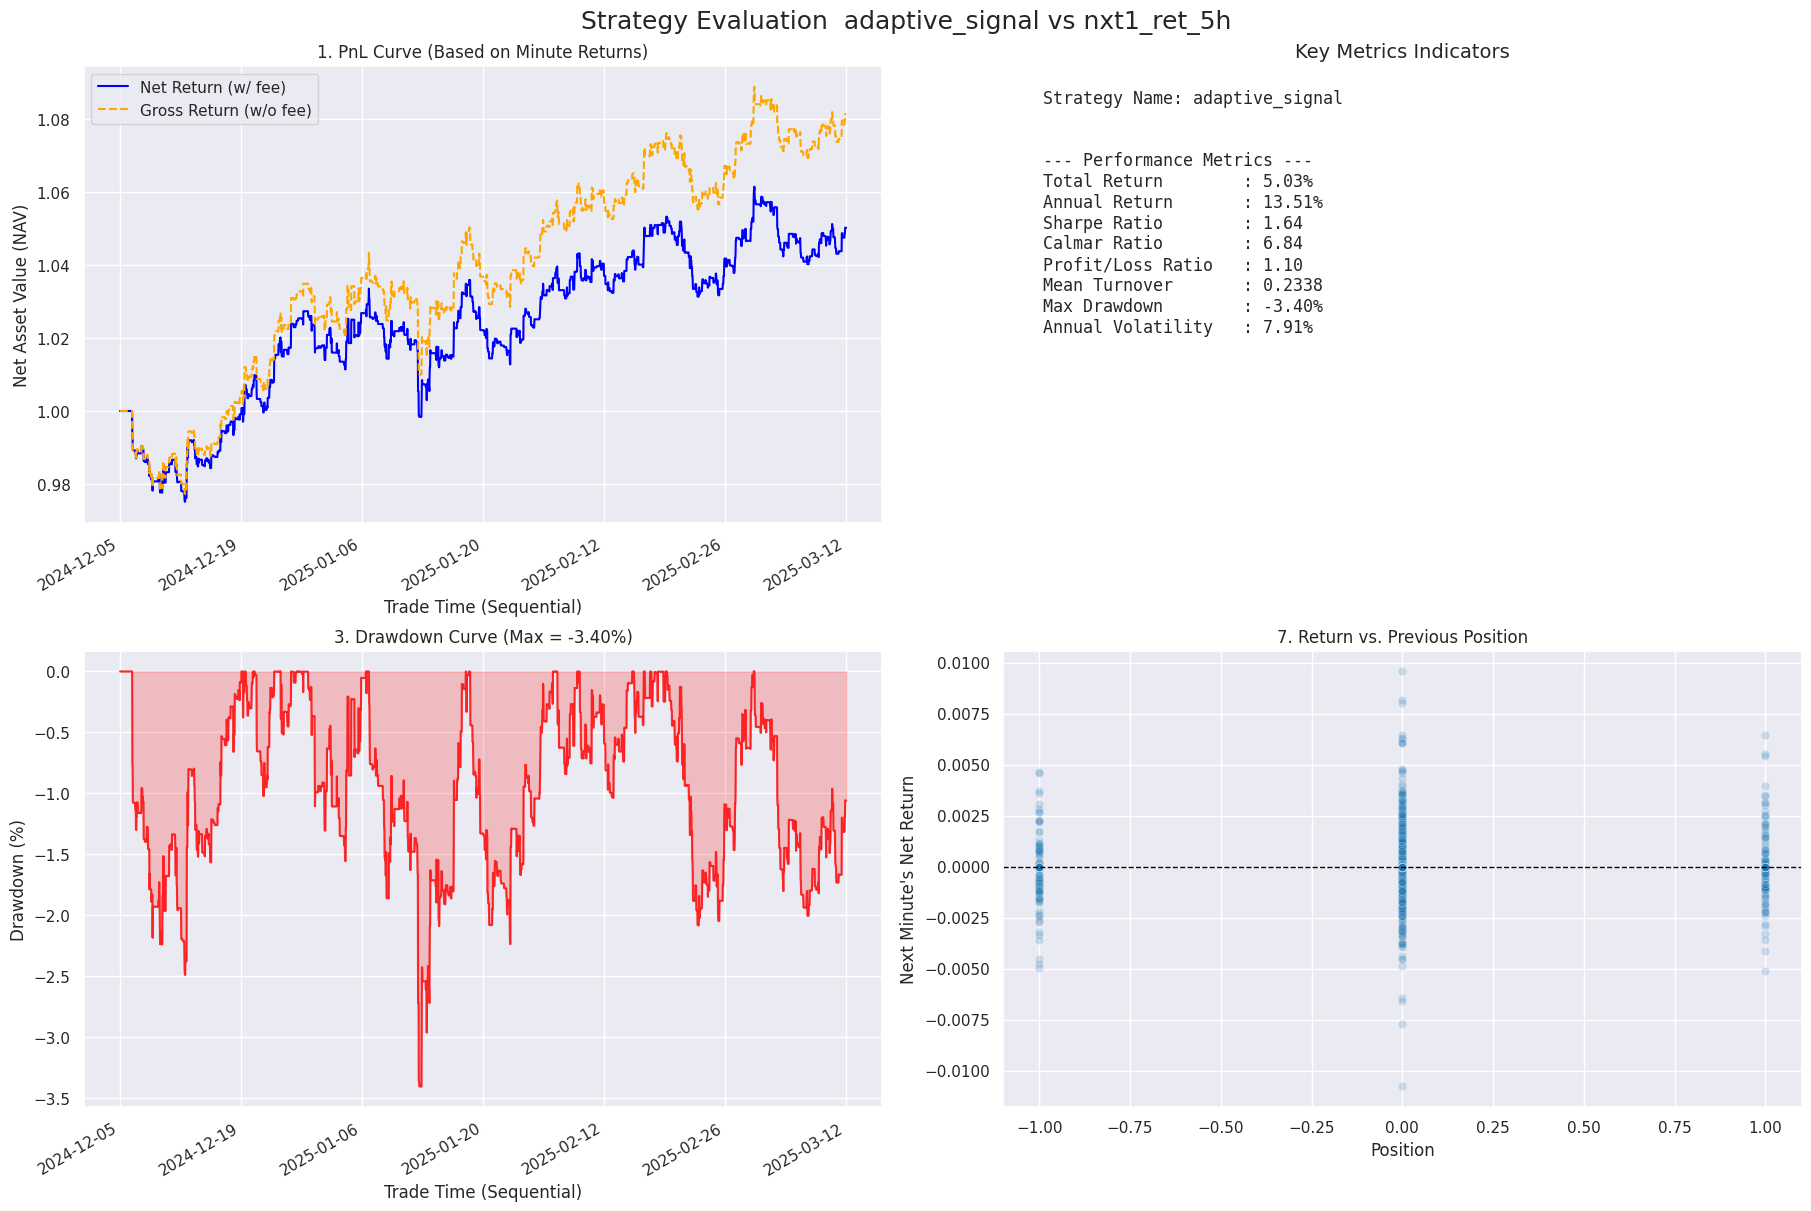

In [60]:
eval1.plot_results()

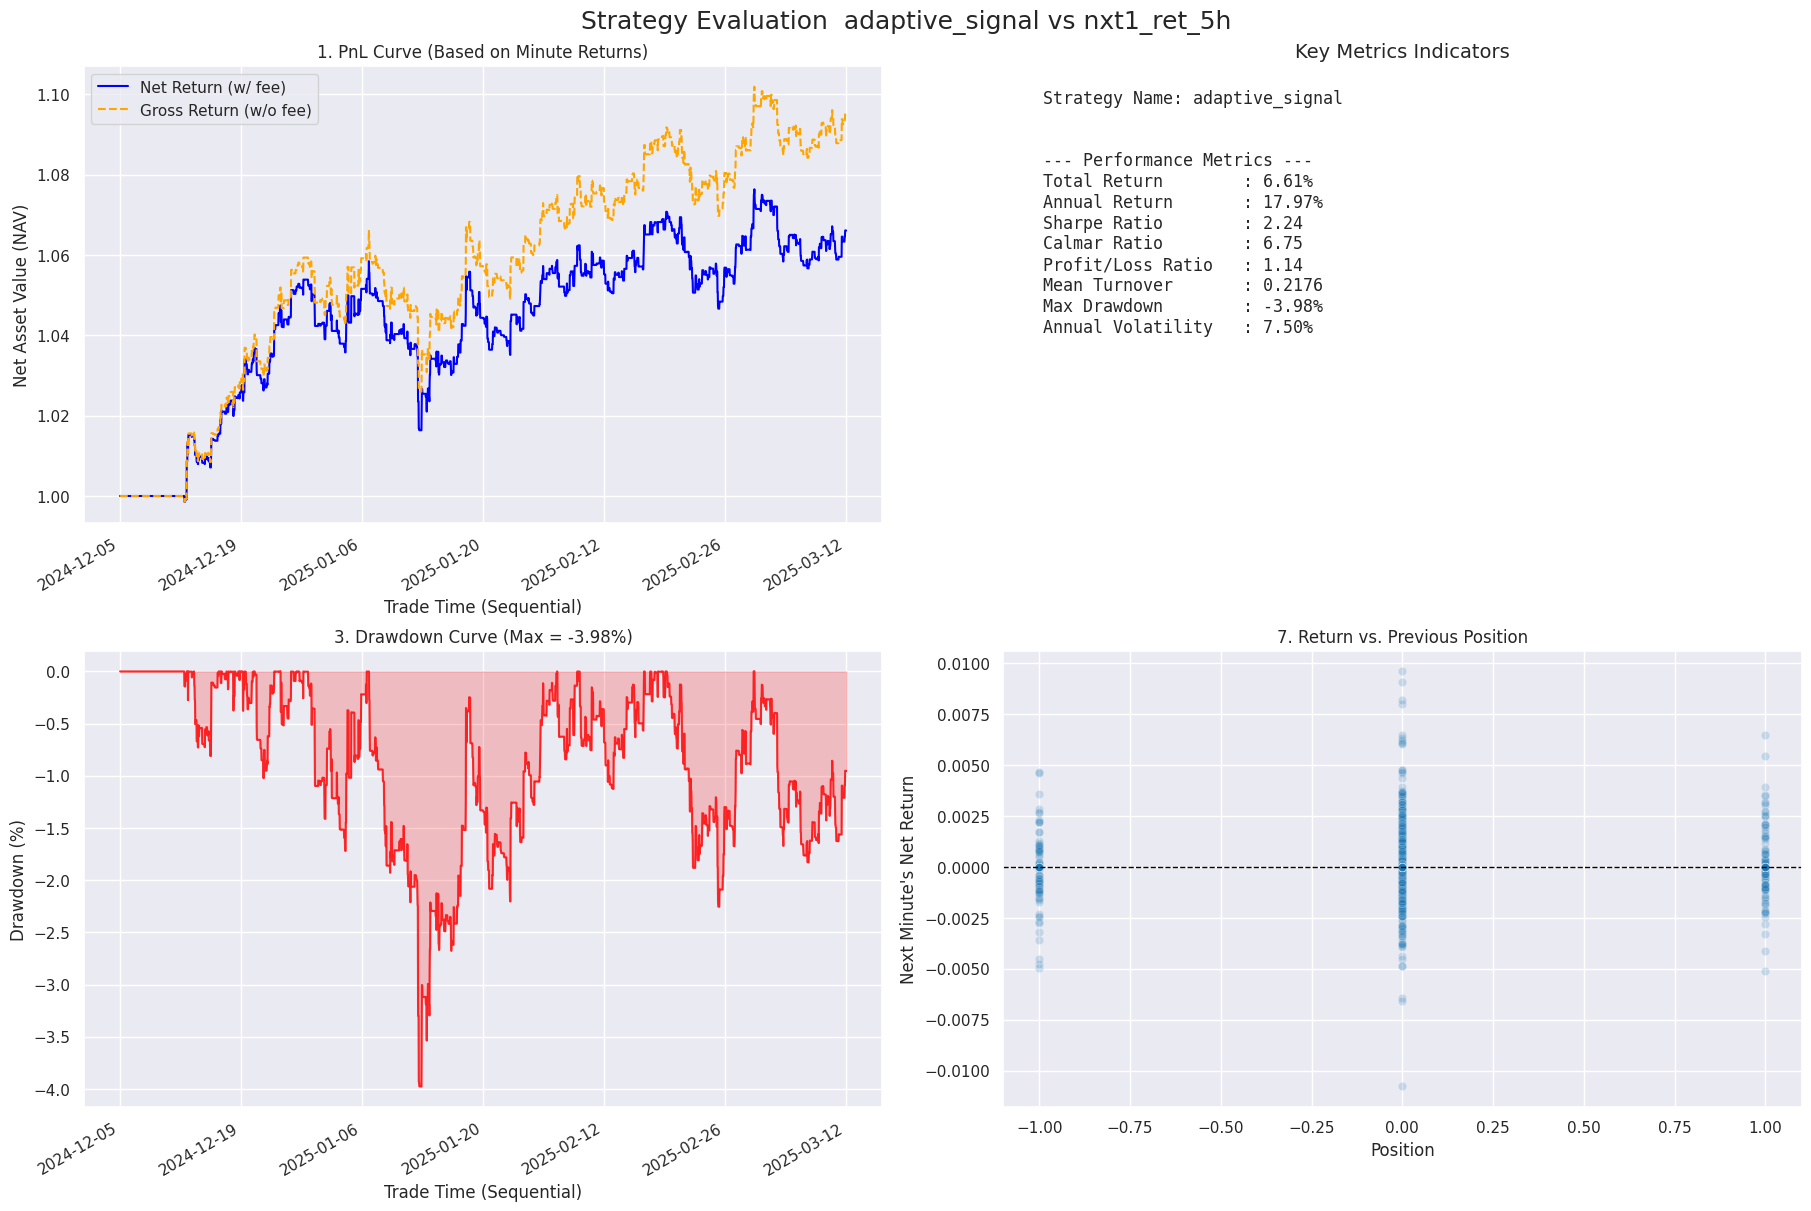

In [68]:
eval1.plot_results()